In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
import pandas as pd
import statistics

df = pd.read_csv('sbi_data.csv', usecols = ['Date', 'Close'], nrows = 66)

U = []
for i in range(65):
    U.append( math.log(df.Close[i+1]/df.Close[i]) )

sigma_sq = statistics.variance(U)
sigma = math.sqrt(sigma_sq)

mean = statistics.mean(U)

mu = sigma_sq/2 + mean
print("Mu = {}, Sigma_Sq = {}, Sigma = {}".format(mu, sigma_sq, sigma))

Mu = 0.0002981060700200028, Sigma_Sq = 0.0004964753607186511, Sigma = 0.022281727058705552


In [3]:
lambda_ = [0.01, 0.05, 0.1, 0.2]

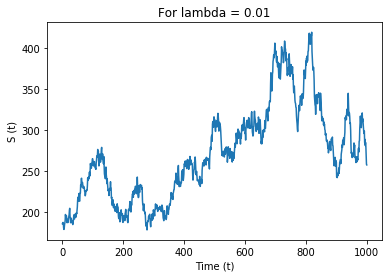

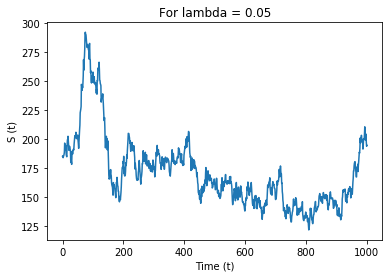

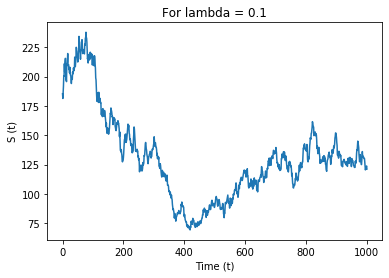

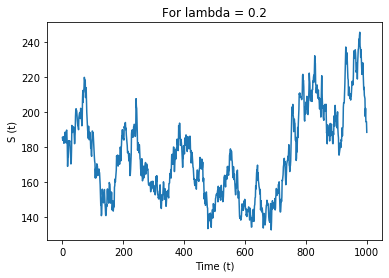

In [10]:
# Algorithm I: Using Poisson Distribution
# (Simulating at Fixed Dates)
for i in range(4):
    X = {}
    t = 0
    X[0] = math.log(df.Close[65])
    
    xAxis = [t]
    yAxis = [df.Close[65]]
    
    for ctr in range(1000):
        z = np.random.normal(0, 1, 1)
        n = np.random.poisson(lambda_[i])
        
        M = 0.00
        if n!=0:
            for j in range(n):
                y = np.random.normal(mu, sigma)
                M = M + y
        
        key =  X[t] + (mu - sigma_sq/2) + sigma*np.random.normal(0, 1, 1) + M
        t = t + 1
        X[t] = key
        yAxis.append(math.exp(key))
        xAxis.append(t)
    
    %matplotlib inline
    plt.plot(xAxis, yAxis)
    plt.title("For lambda = {}".format(lambda_[i]))
    plt.ylabel('S (t)')
    plt.xlabel('Time (t)')
    plt.show()
    print()


In [57]:
# Algorithm II: Using Exponential Distribution
# for i in range(4):
#     X = {}
#     Tj = 0
#     X[Tj] = math.log(df.Close[65])
    
#     t = 0
#     xAxis = [t]
#     yAxis = [df.Close[65]]
    
#     for ctr in range(1000):
#         u = np.random.uniform(0, 1)
#         Rj_ = -math.log(u)/lambda_[i]
#         Zj_ = np.random.normal(0, 1, 1)
#         Yj_ = np.random.normal(mu, sigma)
#         Tj_ = Tj + Rj_
#         X[Tj_] = X[Tj] + (mu - sigma_sq/2)*Rj_ + sigma*math.sqrt(Rj_)*np.random.normal(0, 1) + Yj_
#         Tj = Tj_
        
#         t = t + 1
#         xAxis.append(t)
#         yAxis.append(math.exp(X[Tj_]))
    
#     %matplotlib inline
#     plt.plot(xAxis, yAxis)
#     plt.title("For lambda = {}".format(lambda_[i]))
#     plt.show()
#     print()
